In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

#Loading the Data

In [ ]:
df=pd.read_csv('height-weight.csv')

#The Data

In [ ]:
df.shape

(23, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [ ]:
df.isnull().sum()

,0
Weight,0
Height,0


In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#A plot for the spread of height and weight

Text(0, 0.5, 'Height')

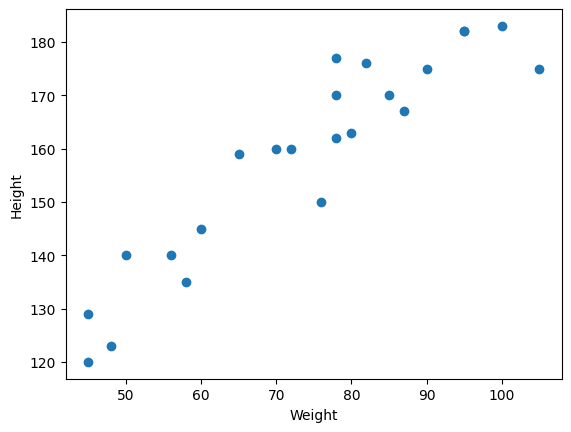

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

#Statistical Interpretation of the Data

In [ ]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


/tmp/ipython-input-1170973858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],kde=True)


<Axes: xlabel='Height', ylabel='Density'>

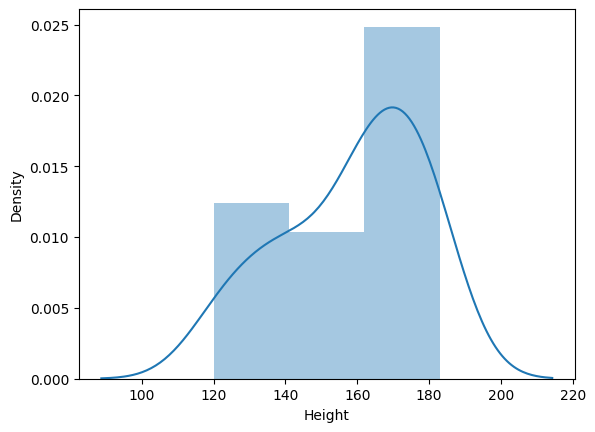

In [ ]:
sns.distplot(df['Height'],kde=True)

/tmp/ipython-input-1241272107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'],kde=True)


<Axes: xlabel='Weight', ylabel='Density'>

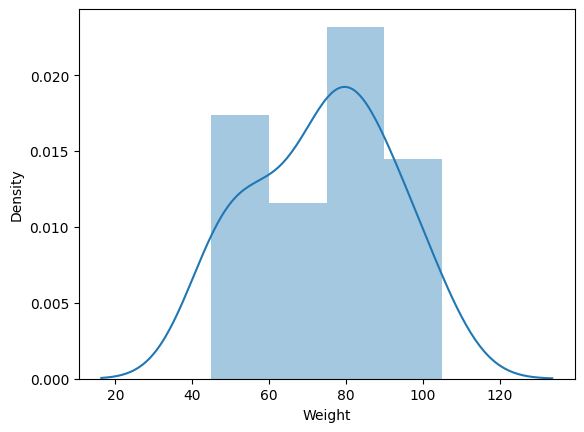

In [ ]:
sns.distplot(df['Weight'],kde=True)

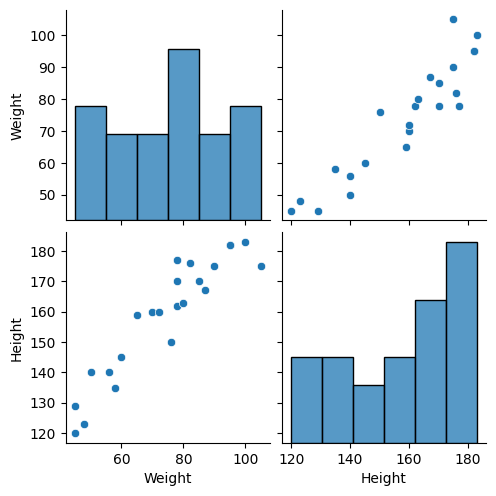

In [ ]:
sns.pairplot(df)

#Indepedent and Dependent Features

In [ ]:
x=df[['Weight']]
y=df['Height']

#Train Test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#Standardization using Standard Scaler

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

#Creating Regression Object

In [ ]:
rg=LinearRegression(n_jobs=-1)

In [ ]:
rg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

#Getting the Slope and Intercept of Linear Regression

In [ ]:
print("Coefficient or slope:",rg.coef_)
print("Intercept:",rg.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


#Plotting the Linear Regression Curve

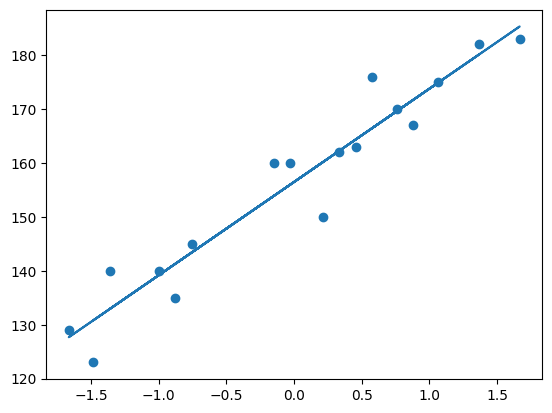

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,rg.predict(X_train))

#Prediction of test data
predicted height output= intercept +coef_(Weights)

y_pred_test =156.470 + 17.29(X_test)

In [ ]:
y_pred=rg.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ",rmse)

Mean Squared Error :  114.84069295228699
Mean Absolute Error :  9.66512588679501
Root Mean Squared Error :  10.716374991212605


R square Score

Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
score=r2_score(y_test,y_pred)
print("The R2 score is : ",score)

0.7360826717981276


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

In [ ]:
adj_R2=1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The R2 score is : ",adj_R2)

The R2 score is :  0.6701033397476595


#Ordinary Linear Regression

In [ ]:
m=sm.OLS(y_train,X_train).fit()

In [ ]:
prediction=m.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [ ]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 06 Oct 2025   Prob (F-statistic):                       0.664
Time:                        18:55:49   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x=int(input("Enter the Weight of the Person : "))
y=rg.predict(sc.transform([[x]]))
print("The Height of the Person is : ",y)

Enter the Weight of the Person : 85
The Height of the Person is :  [169.60047239]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
